In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('churn.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,1.0,42.0,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.88,Yes
1,2,15647311,Hill,608.0,Spain,Female,1.0,41.0,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.58,No
2,3,15619304,Onio,502.0,France,Female,1.0,42.0,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.57,Yes
3,4,15701354,Boni,699.0,France,Female,1.0,39.0,1.0,1.0,0.00,2.0,0.0,0.0,0.0,?,No
4,5,15737888,Mitchell,850.0,Spain,Female,1.0,43.0,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.1,No
5,6,15574012,Chu,645.0,Spain,Male,0.0,44.0,1.0,8.0,113755.78,2.0,1.0,1.0,0.0,149756.71,Yes
6,7,15592531,Bartlett,822.0,France,Male,0.0,-1.0,1.0,7.0,0.00,2.0,0.0,1.0,1.0,10062.8,No
7,8,15656148,Obinna,376.0,Germany,Female,1.0,29.0,1.0,4.0,115046.74,4.0,1.0,1.0,0.0,119346.88,Yes
8,9,15792365,He,501.0,France,Male,0.0,44.0,1.0,4.0,142051.07,2.0,0.0,0.0,1.0,74940.5,No
9,10,15592389,H?,684.0,France,Male,0.0,27.0,1.0,2.0,134603.88,1.0,0.0,1.0,1.0,71725.73,No


Task 1:
What is the proportion of customers who exited and stoppped using the banking services


In [6]:

print(df['Exited'].value_counts())
#answer: 7963

No     7963
Yes    2037
Name: Exited, dtype: int64


The dataset may include irrelevant and redundant varibles. What varibles did you include in the analysis and what were their roles and measurement levelset Justify your choice.

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1, inplace=True)
# drop those because its useless, and sex is better than gender.

In [9]:
#have look at the dataset again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9963 non-null   float64
 1   Geography             9963 non-null   object 
 2   Sex                   9805 non-null   float64
 3   Age                   9963 non-null   float64
 4   CurrentWorkingStatus  9963 non-null   float64
 5   Tenure                9963 non-null   float64
 6   Balance               9963 non-null   float64
 7   NumOfProducts         9859 non-null   float64
 8   ComplaintsLodged      9963 non-null   float64
 9   HasCrCard             9963 non-null   float64
 10  IsActiveMember        9963 non-null   float64
 11  EstimatedSalary       9896 non-null   object 
 12  Exited                10000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1015.8+ KB
None


In [10]:
df.head(10)

,CreditScore,Geography,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,1.0,42.0,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.88,Yes
1,608.0,Spain,1.0,41.0,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.58,No
2,502.0,France,1.0,42.0,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.57,Yes
3,699.0,France,1.0,39.0,1.0,1.0,0.00,2.0,0.0,0.0,0.0,?,No
4,850.0,Spain,1.0,43.0,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.1,No
5,645.0,Spain,0.0,44.0,1.0,8.0,113755.78,2.0,1.0,1.0,0.0,149756.71,Yes
6,822.0,France,0.0,-1.0,1.0,7.0,0.00,2.0,0.0,1.0,1.0,10062.8,No
7,376.0,Germany,1.0,29.0,1.0,4.0,115046.74,4.0,1.0,1.0,0.0,119346.88,Yes
8,501.0,France,0.0,44.0,1.0,4.0,142051.07,2.0,0.0,0.0,1.0,74940.5,No
9,684.0,France,0.0,27.0,1.0,2.0,134603.88,1.0,0.0,1.0,1.0,71725.73,No


Did you have to fix any data quality problems? Detail them

In [11]:
#check cloumn by column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9963 non-null   float64
 1   Geography             9963 non-null   object 
 2   Sex                   9805 non-null   float64
 3   Age                   9963 non-null   float64
 4   CurrentWorkingStatus  9963 non-null   float64
 5   Tenure                9963 non-null   float64
 6   Balance               9963 non-null   float64
 7   NumOfProducts         9859 non-null   float64
 8   ComplaintsLodged      9963 non-null   float64
 9   HasCrCard             9963 non-null   float64
 10  IsActiveMember        9963 non-null   float64
 11  EstimatedSalary       9896 non-null   object 
 12  Exited                10000 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1015.8+ KB


In [12]:
df.isnull().sum()

CreditScore              37
Geography                37
Sex                     195
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         104
Exited                    0
dtype: int64

In [13]:
#checking creditscore
print(df['CreditScore'])
#only 37 missing values, drop them shouldnt make a big different to the dataset
df = df.dropna(subset=["CreditScore"])

0       619.0
1       608.0
2       502.0
3       699.0
4       850.0
        ...  
9995    771.0
9996    516.0
9997    709.0
9998    772.0
9999    792.0
Name: CreditScore, Length: 10000, dtype: float64


In [14]:
#check again after dropping
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                     158
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [15]:
#check if there is any 0s in score
mask = df['CreditScore'] < 1
df.loc[mask, 'CreditScore'] = np.nan
df.loc[mask, 'CreditScore'].count()
#CreditScore is good now

0

In [16]:
#check Geo
df['Geography'].unique()

array(['France', 'Spain', 'Germany', 'DE', 'ES', 'FR'], dtype=object)

In [17]:
df['Geography'].isnull().sum()


0

In [18]:
#change geo to int
geo_map = {'France':0, 'Spain': 1,'Germany':2, 'DE':3, 'ES':4, 'FR':5}

In [19]:
df['Geography'] = df['Geography'].map(geo_map)

In [20]:
#check after change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9963 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9963 non-null   float64
 1   Geography             9963 non-null   int64  
 2   Sex                   9805 non-null   float64
 3   Age                   9963 non-null   float64
 4   CurrentWorkingStatus  9963 non-null   float64
 5   Tenure                9963 non-null   float64
 6   Balance               9963 non-null   float64
 7   NumOfProducts         9859 non-null   float64
 8   ComplaintsLodged      9963 non-null   float64
 9   HasCrCard             9963 non-null   float64
 10  IsActiveMember        9963 non-null   float64
 11  EstimatedSalary       9896 non-null   object 
 12  Exited                9963 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 1.1+ MB


In [21]:
df['Geography'].head(10)

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    2
8    0
9    0
Name: Geography, dtype: int64

In [22]:
#check sex
df['Sex'].isnull().sum()
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                     158
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [23]:
#drop sex because we cant fill it with mean or anything else
df = df.dropna(subset=["Sex"])

In [24]:
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [25]:
#check age
mask = df['Age'] < 1
df.loc[mask, 'Age'] = np.nan
df.loc[mask, 'Age'].count()

0

In [26]:
df['Age'].isnull().sum()
#use mean to fill age

6

In [27]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [28]:
#check again
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [29]:
#check currentworking
df['CurrentWorkingStatus'].unique()
#looks good

array([1., 0.])

In [30]:
#check Tenure
df['Tenure'].head(10)
#Tenure looks good

0    2.0
1    1.0
2    8.0
3    1.0
4    2.0
5    8.0
6    7.0
7    4.0
8    4.0
9    2.0
Name: Tenure, dtype: float64

In [31]:
#check Balance
df['Balance'].head(10)
#Need to ask shu

0         0.00
1     83807.86
2    159660.80
3         0.00
4    125510.82
5    113755.78
6         0.00
7    115046.74
8    142051.07
9    134603.88
Name: Balance, dtype: float64

In [32]:
df['NumOfProducts'].unique()

array([ 1.,  3.,  2.,  4., nan])

In [33]:
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary          67
Exited                    0
dtype: int64

In [34]:
#fill number of product with mean
df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)

In [35]:
df['NumOfProducts'].unique()

array([1.        , 3.        , 2.        , 4.        , 1.53190393])

In [36]:
df['NumOfProducts'] = np.round(df['NumOfProducts'], decimals=0)
print(df['NumOfProducts'].head(10))

0    1.0
1    1.0
2    3.0
3    2.0
4    1.0
5    2.0
6    2.0
7    4.0
8    2.0
9    1.0
Name: NumOfProducts, dtype: float64


In [37]:
df['NumOfProducts'].unique()

array([1., 3., 2., 4.])

In [38]:
df.isnull().sum()

CreditScore              0
Geography                0
Sex                      0
Age                      0
CurrentWorkingStatus     0
Tenure                   0
Balance                  0
NumOfProducts            0
ComplaintsLodged         0
HasCrCard                0
IsActiveMember           0
EstimatedSalary         67
Exited                   0
dtype: int64

In [39]:
#check complaintslodged
df["ComplaintsLodged"].unique()
#looks good

array([1., 0.])

In [40]:
df.isnull().sum()

CreditScore              0
Geography                0
Sex                      0
Age                      0
CurrentWorkingStatus     0
Tenure                   0
Balance                  0
NumOfProducts            0
ComplaintsLodged         0
HasCrCard                0
IsActiveMember           0
EstimatedSalary         67
Exited                   0
dtype: int64

In [41]:
#check hasCrCard
df['HasCrCard'].unique()
#Looks good

array([1., 0.])

In [42]:
#checkIsActivemember
df['IsActiveMember'].unique()
#Looks good

array([1., 0.])

In [43]:
df.isnull().sum()

CreditScore              0
Geography                0
Sex                      0
Age                      0
CurrentWorkingStatus     0
Tenure                   0
Balance                  0
NumOfProducts            0
ComplaintsLodged         0
HasCrCard                0
IsActiveMember           0
EstimatedSalary         67
Exited                   0
dtype: int64

In [44]:
#check EstimatedSalary
df['EstimatedSalary'].head()
df['EstimatedSalary'].isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9805 non-null   float64
 1   Geography             9805 non-null   int64  
 2   Sex                   9805 non-null   float64
 3   Age                   9805 non-null   float64
 4   CurrentWorkingStatus  9805 non-null   float64
 5   Tenure                9805 non-null   float64
 6   Balance               9805 non-null   float64
 7   NumOfProducts         9805 non-null   float64
 8   ComplaintsLodged      9805 non-null   float64
 9   HasCrCard             9805 non-null   float64
 10  IsActiveMember        9805 non-null   float64
 11  EstimatedSalary       9738 non-null   object 
 12  Exited                9805 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 1.0+ MB


In [45]:
#change ? to null
df['EstimatedSalary'].apply(lambda x: np.nan if x == '?' else x) 
df['EstimatedSalary'] = df['EstimatedSalary'].apply(lambda x: np.nan if x == '?' else x)

In [46]:
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts             0
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary         131
Exited                    0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9805 non-null   float64
 1   Geography             9805 non-null   int64  
 2   Sex                   9805 non-null   float64
 3   Age                   9805 non-null   float64
 4   CurrentWorkingStatus  9805 non-null   float64
 5   Tenure                9805 non-null   float64
 6   Balance               9805 non-null   float64
 7   NumOfProducts         9805 non-null   float64
 8   ComplaintsLodged      9805 non-null   float64
 9   HasCrCard             9805 non-null   float64
 10  IsActiveMember        9805 non-null   float64
 11  EstimatedSalary       9674 non-null   object 
 12  Exited                9805 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 1.0+ MB


In [48]:
#change to float
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)

In [49]:
df.isnull().sum()

CreditScore               0
Geography                 0
Sex                       0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts             0
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary         131
Exited                    0
dtype: int64

In [50]:
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)

In [51]:
df.isnull().sum()

CreditScore             0
Geography               0
Sex                     0
Age                     0
CurrentWorkingStatus    0
Tenure                  0
Balance                 0
NumOfProducts           0
ComplaintsLodged        0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9805 non-null   float64
 1   Geography             9805 non-null   int64  
 2   Sex                   9805 non-null   float64
 3   Age                   9805 non-null   float64
 4   CurrentWorkingStatus  9805 non-null   float64
 5   Tenure                9805 non-null   float64
 6   Balance               9805 non-null   float64
 7   NumOfProducts         9805 non-null   float64
 8   ComplaintsLodged      9805 non-null   float64
 9   HasCrCard             9805 non-null   float64
 10  IsActiveMember        9805 non-null   float64
 11  EstimatedSalary       9805 non-null   float64
 12  Exited                9805 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 1.0+ MB


In [53]:
#last is Exited, the type is wrong and change from yes to 0 no to 1
exited_map = {'Yes':0, 'No': 1}
df['Exited'] = df['Exited'].map(exited_map)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           9805 non-null   float64
 1   Geography             9805 non-null   int64  
 2   Sex                   9805 non-null   float64
 3   Age                   9805 non-null   float64
 4   CurrentWorkingStatus  9805 non-null   float64
 5   Tenure                9805 non-null   float64
 6   Balance               9805 non-null   float64
 7   NumOfProducts         9805 non-null   float64
 8   ComplaintsLodged      9805 non-null   float64
 9   HasCrCard             9805 non-null   float64
 10  IsActiveMember        9805 non-null   float64
 11  EstimatedSalary       9805 non-null   float64
 12  Exited                9805 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 1.0 MB


In [55]:
df['Exited'].unique()

array([0, 1], dtype=int64)

Move on to Task 2, which is D tree



In [56]:
rs = 10
X = df.drop(['Exited'], axis=1)
y = df['Exited']
X_mat = X.values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y,test_size=0.3, stratify=y,
 random_state=rs)


In [57]:
#Default model
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

In [58]:
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [59]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


1.0
0.9524133242692047


In [60]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

ComplaintsLodged : 0.8235176171910765
EstimatedSalary : 0.03902892952558776
Balance : 0.03614032056634888
CreditScore : 0.02951966629898504
Age : 0.02936161355913492
Tenure : 0.014151245033944068
Geography : 0.009031730900968201
NumOfProducts : 0.007364269378974969
HasCrCard : 0.00531397025563901
IsActiveMember : 0.003685839224740062
Sex : 0.0028847980646004652
CurrentWorkingStatus : 0.0


In [61]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("DefaultModel.png")
# You can find this file saved in the same directory as this notebook.

In [62]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
     'max_depth': range(2, 7),
     'min_samples_leaf': range(20, 60, 10)}
cv = GridSearchCV(param_grid=params, estimator=
     DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9698382631502258
Test accuracy: 0.9694085656016316
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       599
           1       0.98      0.98      0.98      2343

    accuracy                           0.97      2942
   macro avg       0.95      0.95      0.95      2942
weighted avg       0.97      0.97      0.97      2942

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}


In [64]:
test_score = []
train_score = []
# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
 model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
 model.fit(X_train, y_train)

 test_score.append(model.score(X_test, y_test))
 train_score.append(model.score(X_train, y_train))

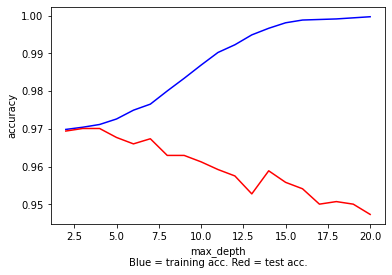

In [65]:
import matplotlib.pyplot as plt
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [70]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
     'max_depth': range(1, 3),
     'min_samples_leaf': range(15, 25)}
cv = GridSearchCV(param_grid=params, estimator=
     DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9698382631502258
Test accuracy: 0.9694085656016316
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       599
           1       0.98      0.98      0.98      2343

    accuracy                           0.97      2942
   macro avg       0.95      0.95      0.95      2942
weighted avg       0.97      0.97      0.97      2942

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 15}


In [69]:
cv.get_params(deep=True)

{'cv': 10,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 10,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=10),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': range(1, 3),
  'min_samples_leaf': range(15, 25)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [98]:
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

ComplaintsLodged : 0.8243820341399398
EstimatedSalary : 0.039768669145937026
Balance : 0.037929855399561944
Age : 0.027323115824003028
CreditScore : 0.02714485577742415
Tenure : 0.015785882225051943
Geography : 0.00845113108849042
NumOfProducts : 0.007371999388794181
HasCrCard : 0.005159956340272483
Sex : 0.0035626102530372543
IsActiveMember : 0.003119890417487841
CurrentWorkingStatus : 0.0


In [72]:
#logic
rs = 10
X = df.drop(['Exited'], axis=1)
y = df['Exited']
X_mat = X.values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y,test_size=0.3, stratify=y,
 random_state=rs)

In [73]:
# initialise a standard scaler object
scaler = StandardScaler()
# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
 col = X_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))
# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)
print("After scaling\n-------------")
for i in range(5):
 col = X_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))
# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 350.0, max 850.0, mean 650.61 and std dev 96.80
Variable #1: min 0.0, max 5.0, mean 0.78 and std dev 0.88
Variable #2: min 0.0, max 1.0, mean 0.45 and std dev 0.50
Variable #3: min 18.0, max 92.0, mean 38.91 and std dev 10.43
Variable #4: min 0.0, max 1.0, mean 1.00 and std dev 0.06
After scaling
-------------
Variable #0: min -3.1055292934856955, max 2.0598309715318766, mean -0.00 and std dev 1.00
Variable #1: min -0.8811842587879192, max 4.800483881066918, mean -0.00 and std dev 1.00
Variable #2: min -0.9135295398956209, max 1.0946553519377058, mean -0.00 and std dev 1.00
Variable #3: min -2.0053731104611985, max 5.091136095882261, mean -0.00 and std dev 1.00
Variable #4: min -17.63390329605376, max 0.05670894204256401, mean -0.00 and std dev 1.00


In [100]:
def visualize_decision_tree(dm_model, feature_names, save_name):
 dotfile = StringIO()
 export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
 graph = pydot.graph_from_dot_data(dotfile.getvalue())
 graph[0].write_png(save_name) 

visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree.png")

In [74]:
model = LogisticRegression(random_state=rs)
# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [75]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9694011365292147
Test accuracy: 0.9694085656016316
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       599
           1       0.98      0.98      0.98      2343

    accuracy                           0.97      2942
   macro avg       0.95      0.95      0.95      2942
weighted avg       0.97      0.97      0.97      2942



In [76]:
feature_names = X.columns
coef = model.coef_[0]
# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]
for i in range(len(coef)):
 print(feature_names[i], ':', coef[i])

CreditScore : 0.06571292573476192
Geography : -0.34534583056432966
Sex : -0.33696817984400146
Age : -0.7698525625324227
CurrentWorkingStatus : -0.011537556187620724
Tenure : -0.03449531785290775
Balance : -0.07941526279791432
NumOfProducts : 0.015629920358139534
ComplaintsLodged : -2.643281291143007
HasCrCard : 0.04643873910763701
IsActiveMember : 0.5514010450251824
EstimatedSalary : -0.044715732749782446


In [77]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
     print(feature_names[i], ':', coef[i])

ComplaintsLodged : -2.643281291143007
Age : -0.7698525625324227
IsActiveMember : 0.5514010450251824
Geography : -0.34534583056432966
Sex : -0.33696817984400146
Balance : -0.07941526279791432
CreditScore : 0.06571292573476192
HasCrCard : 0.04643873910763701
EstimatedSalary : -0.044715732749782446
Tenure : -0.03449531785290775
NumOfProducts : 0.015629920358139534
CurrentWorkingStatus : -0.011537556187620724


In [79]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9696925542765554
Test accuracy: 0.96974847042828
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       599
           1       0.98      0.98      0.98      2343

    accuracy                           0.97      2942
   macro avg       0.95      0.95      0.95      2942
weighted avg       0.97      0.97      0.97      2942

{'C': 0.1}


In [80]:
df

,CreditScore,Geography,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,1.0,42.0,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.880000,0
1,608.0,1,1.0,41.0,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.580000,1
2,502.0,0,1.0,42.0,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.570000,0
3,699.0,0,1.0,39.0,1.0,1.0,0.00,2.0,0.0,0.0,0.0,100172.725998,1
4,850.0,1,1.0,43.0,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,0.0,39.0,1.0,5.0,0.00,2.0,0.0,1.0,0.0,96270.640000,1
9996,516.0,0,0.0,35.0,1.0,10.0,57369.61,1.0,0.0,1.0,1.0,101699.770000,1
9997,709.0,0,1.0,36.0,1.0,7.0,0.00,1.0,1.0,0.0,1.0,42085.580000,0
9998,772.0,2,0.0,42.0,1.0,3.0,75075.31,2.0,1.0,1.0,0.0,92888.520000,0


D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

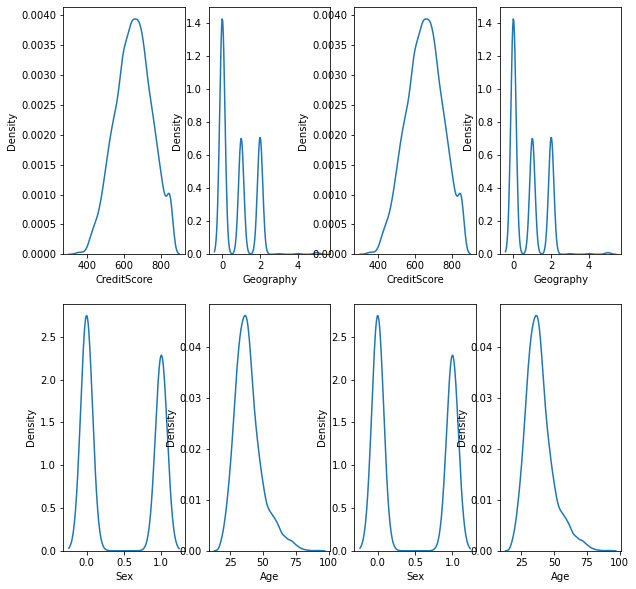

In [82]:
def plot_skewed_columns(df):
     # setting up subplots for easier visualisation
     f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)
     # gift avg plots
     sns.distplot(df['CreditScore'].dropna(), hist=False, ax=axes[0,0])
     sns.distplot(df['Geography'].dropna(), hist=False, ax=axes[0,1])
     sns.distplot(df['Sex'].dropna(), hist=False, ax=axes[1,0])
     sns.distplot(df['Age'].dropna(), hist=False, ax=axes[1,1])
     # gift cnt plots
     sns.distplot(df['CreditScore'].dropna(), hist=False, ax=axes[0,2])
     sns.distplot(df['Geography'].dropna(), hist=False, ax=axes[0,3])
     sns.distplot(df['Sex'].dropna(), hist=False, ax=axes[1,2])
     sns.distplot(df['Age'].dropna(), hist=False, ax=axes[1,3])
     plt.show()
plot_skewed_columns(df)

D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

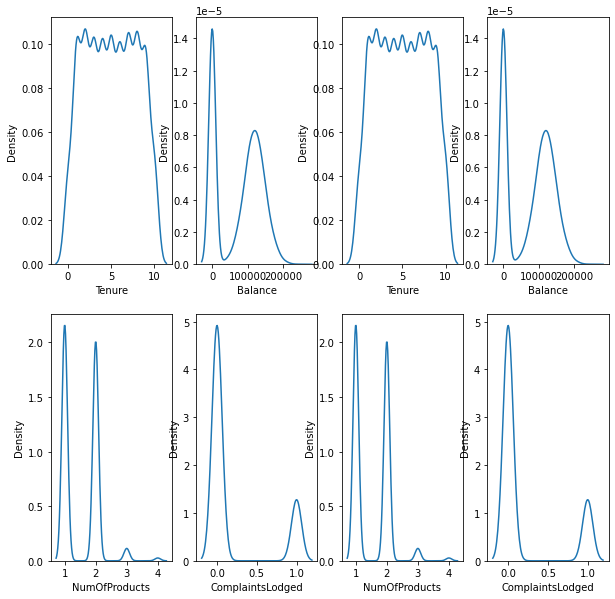

In [85]:
def plot_skewed_columns(df):
     # setting up subplots for easier visualisation
     f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)
     # gift avg plots
     sns.distplot(df['Tenure'].dropna(), hist=False, ax=axes[0,0])
     sns.distplot(df['Balance'].dropna(), hist=False, ax=axes[0,1])
     sns.distplot(df['NumOfProducts'].dropna(), hist=False, ax=axes[1,0])
     sns.distplot(df['ComplaintsLodged'].dropna(), hist=False, ax=axes[1,1])
     # gift cnt plots
     sns.distplot(df['Tenure'].dropna(), hist=False, ax=axes[0,2])
     sns.distplot(df['Balance'].dropna(), hist=False, ax=axes[0,3])
     sns.distplot(df['NumOfProducts'].dropna(), hist=False, ax=axes[1,2])
     sns.distplot(df['ComplaintsLodged'].dropna(), hist=False, ax=axes[1,3])
     plt.show()
plot_skewed_columns(df)

D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

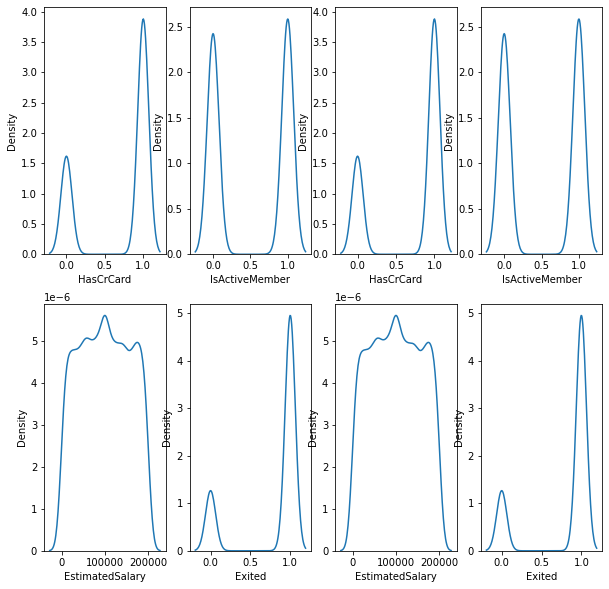

In [86]:
def plot_skewed_columns(df):
     # setting up subplots for easier visualisation
     f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)
     # gift avg plots
     sns.distplot(df['HasCrCard'].dropna(), hist=False, ax=axes[0,0])
     sns.distplot(df['IsActiveMember'].dropna(), hist=False, ax=axes[0,1])
     sns.distplot(df['EstimatedSalary'].dropna(), hist=False, ax=axes[1,0])
     sns.distplot(df['Exited'].dropna(), hist=False, ax=axes[1,1])
     # gift cnt plots
     sns.distplot(df['HasCrCard'].dropna(), hist=False, ax=axes[0,2])
     sns.distplot(df['IsActiveMember'].dropna(), hist=False`, ax=axes[0,3])
     sns.distplot(df['EstimatedSalary'].dropna(), hist=False, ax=axes[1,2])
     sns.distplot(df['Exited'].dropna(), hist=False, ax=axes[1,3])
     plt.show()
plot_skewed_columns(df)

D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ana\file\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

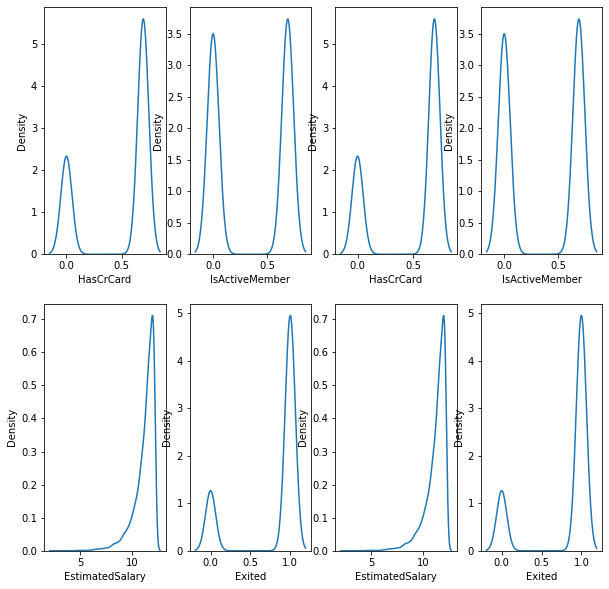

In [89]:
columns_to_transform = ['CreditScore', 'Geography', 'Sex', 'Age',
 'CurrentWorkingStatus', 'Tenure', 'Balance', 'NumOfProducts','ComplaintsLodged','HasCrCard','IsActiveMember','EstimatedSalary']
df_log = df.copy()
for col in columns_to_transform:
 df_log[col] = df_log[col].apply(lambda x: x+1)
 df_log[col] = df_log[col].apply(np.log)
plot_skewed_columns(df_log)

In [90]:
y_log = df_log['Exited']
X_log = df_log.drop(['Exited'], axis=1)
X_mat_log = X_log.values
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log,
 y_log,
test_size=0.3,
stratify=y_log,
random_state=rs)
# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)


In [91]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)
# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))
y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.969546845402885
Test accuracy: 0.9694085656016316
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       599
           1       0.98      0.98      0.98      2343

    accuracy                           0.97      2942
   macro avg       0.95      0.95      0.95      2942
weighted avg       0.97      0.97      0.97      2942

{'C': 0.1}
